# Case Study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Data Analysis
We can see that the data is about car statistics, and we want to be able to predict the price of the car based on other variables.

Lets first process the data into suitable formats.

In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Now, we can see that Model has damn near 312 different types, and so we're gonna drop it cause thats a lot of dummy variables. Meanwhile, we also see that Registration has a lot of Yes values within the dataframe, and so it probably wont have a significant effect on the regression model.

In [5]:
data = data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

We can see that there are many empty data, but since its less than 5% of the full data, we can simply remove all the null values so that we can have a complete dataset.

In [7]:
data = data.dropna(axis=0)      # Note: The axis variable indicates what we are removing, 0 means row and 1 means column
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## EDA

/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/4196895882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

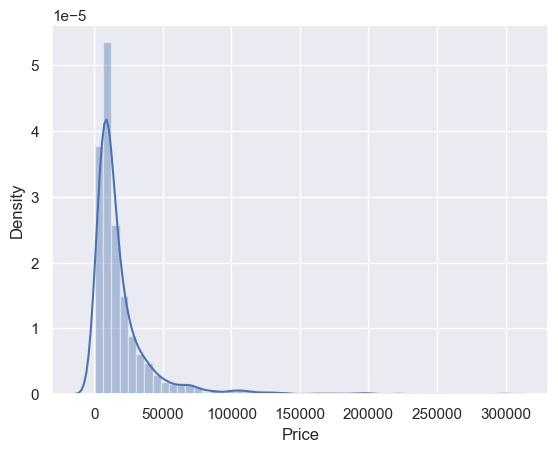

In [8]:
sns.distplot(data['Price'])

Now, we can see that there are a couple of outliers in the data. This is shown by how skewed some of our data is. In order to get rid of this, we can simply get rid of the top or bottom 1% of data, which would be the extreme outliers within that column.

In [9]:
q = data['Price'].quantile(0.99)
data_1 = data[data['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


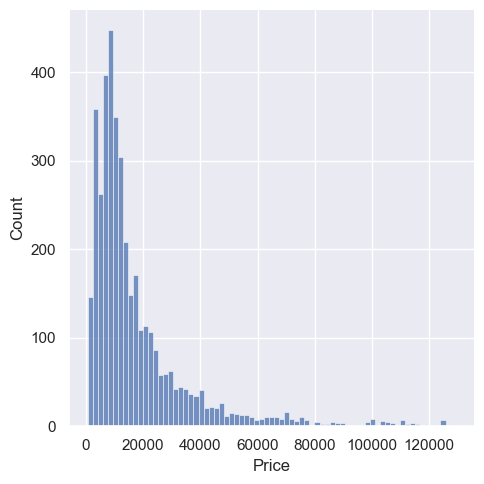

In [10]:
sns.displot(data_1['Price'])

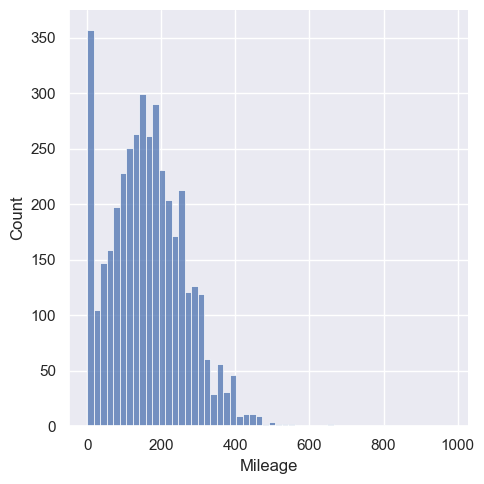

In [11]:
sns.displot(data['Mileage'])

In [12]:
# Same problem as the Price, outliers on the right
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

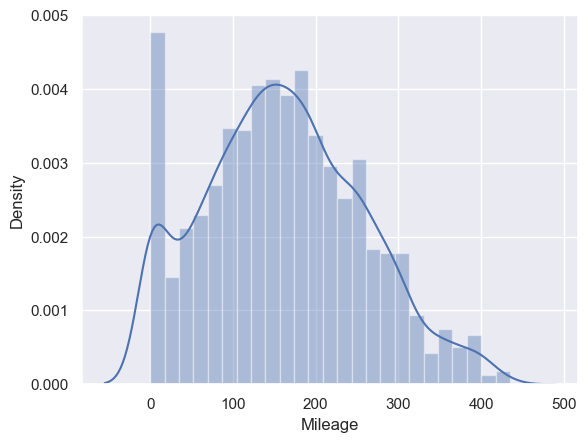

In [13]:
sns.distplot(data_2['Mileage'])

/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/2389813043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

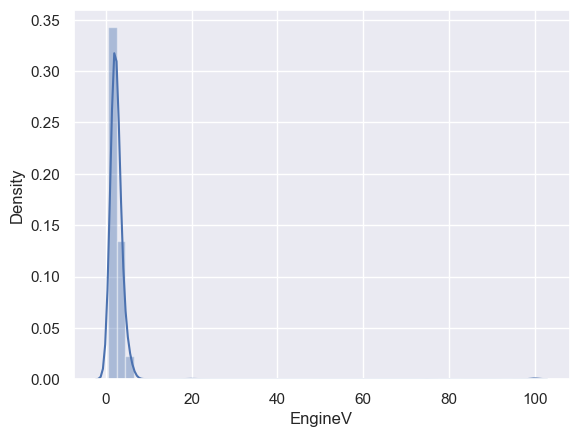

In [14]:
sns.distplot(data_2['EngineV'])

In [15]:
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV']<q]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

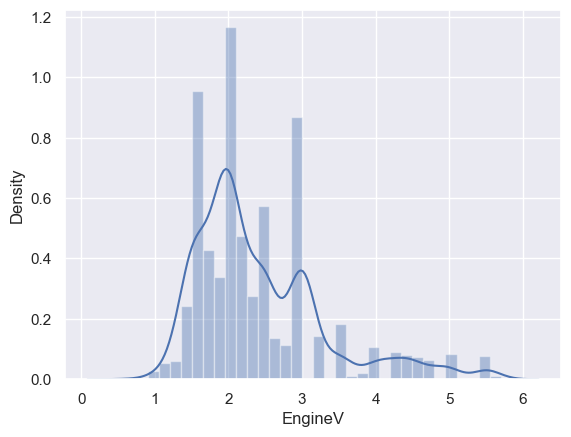

In [16]:
sns.distplot(data_3['EngineV'])

/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

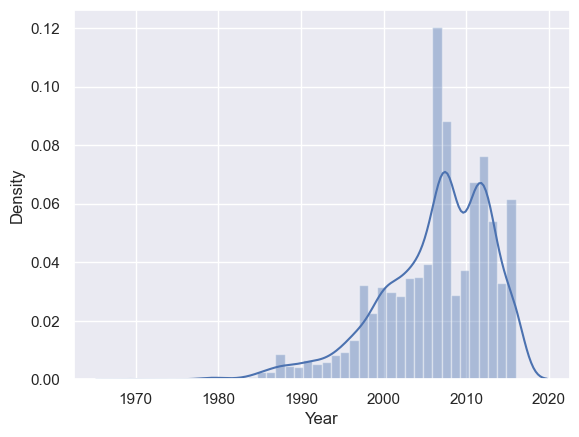

In [17]:
sns.distplot(data_3['Year'])

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

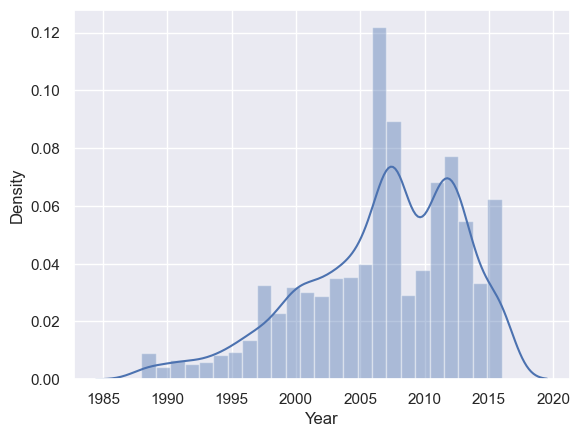

In [19]:
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS Assumptions

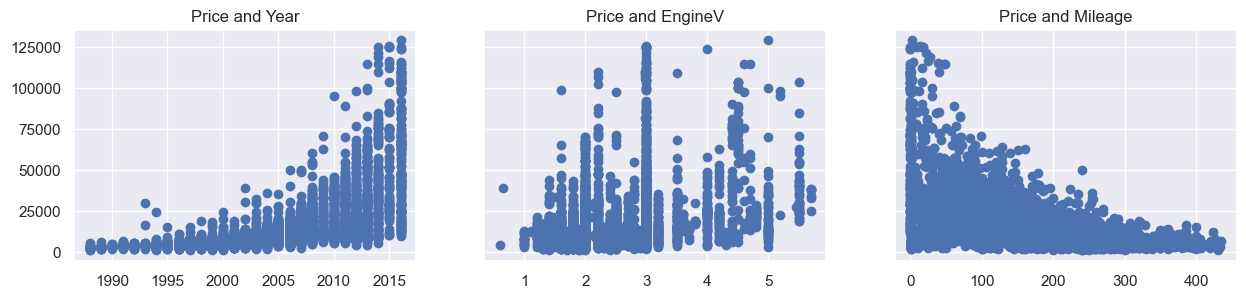

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can see the above relationships are very much not linear. We would use logistic regression in practice, but instead we choose to transform some of the variables so that they can fit our linear regression model.

In [23]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


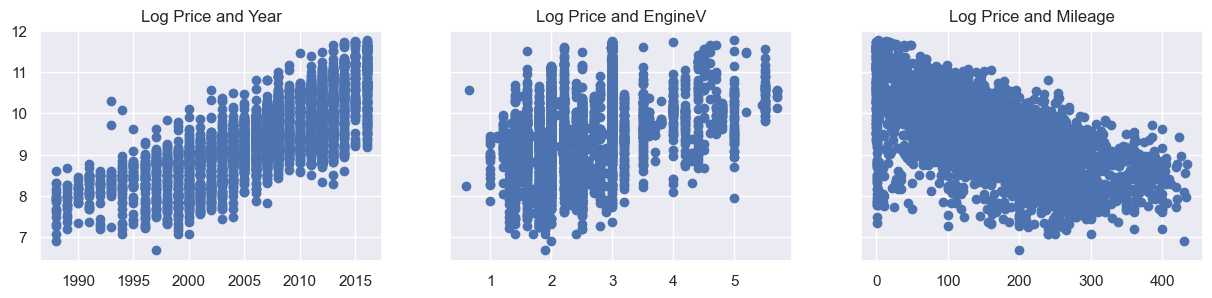

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [25]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

We can see now that linearity is satisfied - and so is no endogencity as well as normality and homodestacity. All we have left is to check for multicollinearity, which basically is a check for whether the variables are correlated to one another. Now, this is obviously going to be present (Year would dictate how much Mileage) but its better to check if we can sort of bypass this for our model.

In [26]:
# In order to check for multicollinearity, we must use statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.798257,Mileage
1,10.823028,Year
2,8.262153,EngineV


Heres how to translate VIF:

1. VIF = 1; No Multicollinearity
2. 1 < VIF < 5; Perfectly okay
3. 5 < VIF; Unaccepatble

In [27]:
# So, we can see that Year is a no-go, so we will drop it
data_cleaned = data_cleaned.drop(['Year'], axis=1)

So we finished all the numerical data cleaning and processing. Now its time to process our categorical data.
## Dummy Variables

In [28]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [29]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression

In [33]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [34]:
# Lets scale the numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [35]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Create the Regression

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
y_hat = model.predict(x_train)

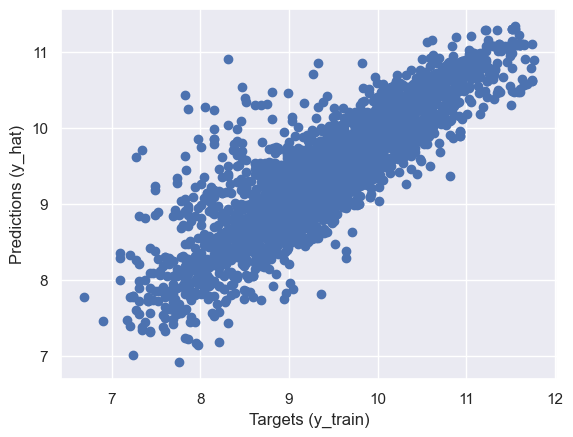

In [39]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')

plt.show()

/var/folders/qw/y3ys43gs7cdblx18lvtrz8r40000gn/T/ipykernel_2785/2264365770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

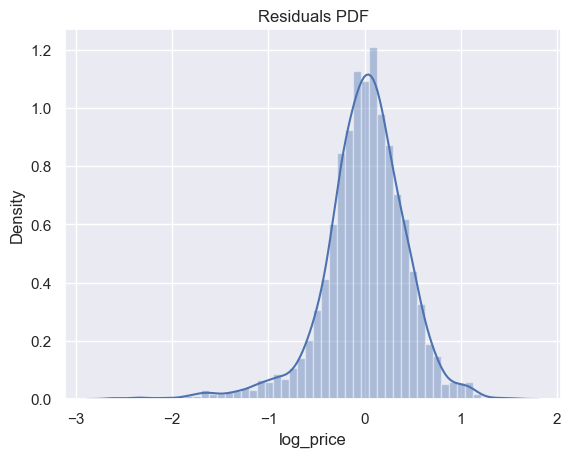

In [40]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF')

In [41]:
model.score(x_train, y_train)

0.7530570002483704

In [42]:
# Lets make a summary table for this regression really quickly
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = model.coef_
reg_summary

,Features,Weights
0,Mileage,-0.456174
1,EngineV,0.226055
2,Brand_BMW,0.009936
3,Brand_Mercedes-Benz,0.006353
4,Brand_Mitsubishi,-0.137788
5,Brand_Renault,-0.176381
6,Brand_Toyota,-0.054709
7,Brand_Volkswagen,-0.087436
8,Body_hatch,-0.138774
9,Body_other,-0.091966


This model isn't really interpretable, cause we standardized the dummies, which just makes it lose all meaning, as well as are calculating all this for the log_price instead of actual price.

Now, we can also see that the dummy variables do not have Audi in there cause we dropped it when creating the dummy variables (to prevent multicollinearity). This means that, for all the coefficients we have for the car model, they are interpreted based on Audi. For example, we see that BMW has a coef of 0.009936, which makes it 0.00936 times more expensive than an Audi.

Now, lets move on to the final part of the entire case study:

## Testing

In [43]:
y_hat_test = model.predict(x_test)

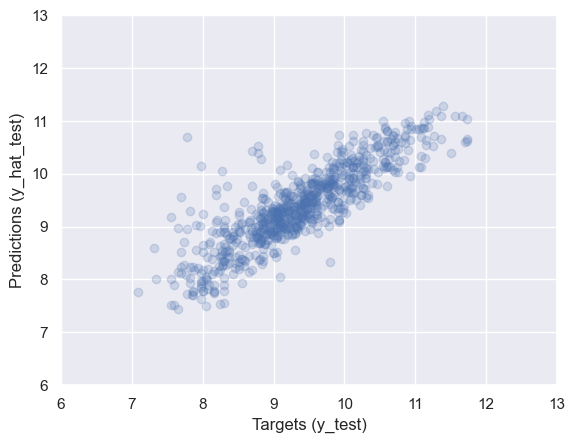

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)      # The alpha variable makes it so that higher concentrated regions are darker in colour
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(6, 13)
plt.ylim(6, 13)

plt.show()

In [49]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])   # We take the exponential to remove the log we have applied before
df_pf

,Predictions
0,28900.261353
1,42695.054176
2,3650.481935
3,11074.752981
4,11094.645963
...,...
763,12206.514006
764,27485.520257
765,5741.781649
766,8140.510584


In [50]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,28900.261353,4200.0
1,42695.054176,NaN
2,3650.481935,NaN
3,11074.752981,NaN
4,11094.645963,NaN
...,...,...
763,12206.514006,NaN
764,27485.520257,6950.0
765,5741.781649,NaN
766,8140.510584,NaN


In [51]:
# We have a bunch of missing values because the y_test data frame still preserves its indices, and the new data frame tries to match them
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,28900.261353,41500.0
1,42695.054176,125000.0
2,3650.481935,5000.0
3,11074.752981,9999.0
4,11094.645963,8900.0
...,...,...
763,12206.514006,14899.0
764,27485.520257,26850.0
765,5741.781649,3000.0
766,8140.510584,4000.0


In [52]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [53]:
df_pf['Difference%'] = np.abs( (df_pf['Residual'] / df_pf['Target']) * 100 )

In [54]:
df_pf

,Predictions,Target,Residual,Difference%
0,28900.261353,41500.0,12599.738647,30.360816
1,42695.054176,125000.0,82304.945824,65.843957
2,3650.481935,5000.0,1349.518065,26.990361
3,11074.752981,9999.0,-1075.752981,10.758606
4,11094.645963,8900.0,-2194.645963,24.658943
...,...,...,...,...
763,12206.514006,14899.0,2692.485994,18.071589
764,27485.520257,26850.0,-635.520257,2.366928
765,5741.781649,3000.0,-2741.781649,91.392722
766,8140.510584,4000.0,-4140.510584,103.512765


In [55]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,768.000000,768.000000,768.000000,768.000000
mean,15701.730567,16928.424531,1226.693964,39.154030
std,12624.180103,17521.839532,10045.907834,86.826838
min,1715.361758,1199.000000,-41533.373814,0.070006
25%,7528.926017,6800.000000,-2372.734013,9.821921
50%,11436.737550,11250.000000,-36.120170,23.026701
75%,19213.378480,20400.000000,2776.653594,41.468524
max,79463.516115,125000.000000,84097.289451,1730.557242


We can see that the maximum difference% is really high, and hence some values are not being predicted well at all. However, most of the values are within 50% (not good, but better than the 1730) and so the model is ok. Most of these extreme differences come at the low prices as we saw earlier in the graph, so we may be missing some data or variable that might help us predict the model better. Right now though, we only have these to work with, and so here is the best we can do.